# Report of the merge results

This notebook is used to generate the plots that would aid in analysing the results of the tag generation. The plots that are generated in this notebook are

1. Distribution of frequency of tokens vs number of tokens 
2. Distribution of number of tokens with and without a correct spelling
3. Comparison plots of _1_ and _2_, before and after merge.
4. Distribution of similarity scores at each round (and iteration) in merging the tokens.

## Imports

In [1]:
import json
import pickle

import numpy as np
import pandas as pd

import seaborn as sns, matplotlib.pyplot as plt

## Correctly spelled words

The list of correctly spelled words is stored as pickle file at `data/intermediate_steps/words_with_correct_spellings.pickle`. The pickle file is read to use the words set.

In [2]:
with open(
    "./../data/intermediate_steps/words_with_correct_spellings.pickle", "rb"
) as outfile:
    words_with_correct_spellings = pickle.load(outfile)

## Before Processing

At this stage, the profession strings were cleaned for most of the special characters, mistakenly broken tokens are combined and tokens are generated after refiltering with dots and normalising and de-normalising the tokens not present in the dictionary.

### Read the unique tokens before merging

In [3]:
with open("./../data/intermediate_steps/unique_denormalised_tokens.json", encoding="utf8") as f:
    unique_tokens_before_merge_with_count = json.load(f)
    
unique_tokens_before_merge = unique_tokens_before_merge_with_count.keys()
unique_tokens_before_merge_in_dict = [uniq_tok for uniq_tok in unique_tokens_before_merge if uniq_tok in words_with_correct_spellings]
num_of_unique_tokens_before_merge = len(unique_tokens_before_merge)
num_of_unique_tokens_before_merge_in_dict = len(unique_tokens_before_merge_in_dict)
percent_in_dict = round(((num_of_unique_tokens_before_merge_in_dict/num_of_unique_tokens_before_merge)*100),2)

print("Number of unique tokens that represent the professions before the merginig are {}, \nand {} out of them are in the dictionary ({}%).".format(
    num_of_unique_tokens_before_merge, num_of_unique_tokens_before_merge_in_dict, percent_in_dict))

Number of unique tokens that represent the professions before the merginig are 87979, 
and 18882 out of them are in the dictionary (21.46%).


### Distribution of Frequency of Token Frequency

In [4]:
freq_of_token_freq_before_merge = {}

for token, token_prop in unique_tokens_before_merge_with_count.items():
    count = token_prop["count"]
    if not count in freq_of_token_freq_before_merge:
        freq_of_token_freq_before_merge[count] = {"no_of_tokens": 0, "in_dictionary": 0, "not_in_dictionary":0}
    freq_of_token_freq_before_merge[count]["no_of_tokens"] += 1
    if token in words_with_correct_spellings:
        freq_of_token_freq_before_merge[count]["in_dictionary"] += 1
    else:
        freq_of_token_freq_before_merge[count]["not_in_dictionary"] += 1
    
freq_of_token_freq_before_merge_df = pd.DataFrame.from_dict(freq_of_token_freq_before_merge,
                                                  orient='index'
                                                 ).sort_values(by=['no_of_tokens'], ascending=False
                                                              ).rename_axis('token_frequency').reset_index()


freq_of_token_freq_before_merge_df["no_of_tokens_prop"] = freq_of_token_freq_before_merge_df["no_of_tokens"]/freq_of_token_freq_before_merge_df["no_of_tokens"].sum()
freq_of_token_freq_before_merge_df["in_dictionary_prop"] = freq_of_token_freq_before_merge_df["in_dictionary"]/freq_of_token_freq_before_merge_df["in_dictionary"].sum()
freq_of_token_freq_before_merge_df["not_in_dictionary_prop"] = freq_of_token_freq_before_merge_df["not_in_dictionary"]/freq_of_token_freq_before_merge_df["not_in_dictionary"].sum()

In [5]:
freq_of_token_freq_before_merge_df

,token_frequency,no_of_tokens,in_dictionary,not_in_dictionary,no_of_tokens_prop,in_dictionary_prop,not_in_dictionary_prop
0,1,48718,4016,44702,0.553746,0.212689,0.646946
1,2,10789,2034,8755,0.122632,0.107722,0.126706
2,3,5174,1229,3945,0.058809,0.065088,0.057094
3,4,3177,850,2327,0.036111,0.045016,0.033677
4,5,2132,660,1472,0.024233,0.034954,0.021303
...,...,...,...,...,...,...,...
1604,1992,1,1,0,0.000011,0.000053,0.000000
1605,2001,1,1,0,0.000011,0.000053,0.000000
1606,2005,1,1,0,0.000011,0.000053,0.000000
1607,2011,1,1,0,0.000011,0.000053,0.000000


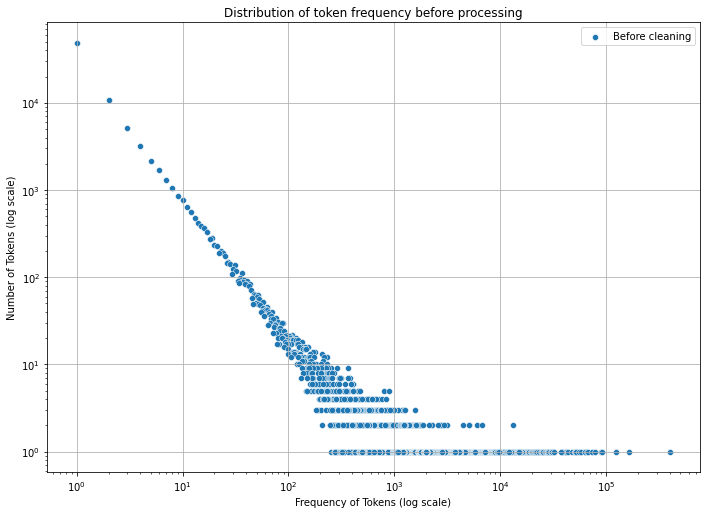

In [6]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
count_freq_plot_before_merge = sns.scatterplot(x="token_frequency", y="no_of_tokens",
                                            data=freq_of_token_freq_before_merge_df, label='Before cleaning', ax=ax)
count_freq_plot_before_merge.set(yscale='log')
count_freq_plot_before_merge.set(xscale='log')
count_freq_plot_before_merge.set(title="Distribution of token frequency before processing")
count_freq_plot_before_merge.set(xlabel="Frequency of Tokens (log scale)")
count_freq_plot_before_merge.set(ylabel="Number of Tokens (log scale)")
ax.grid()

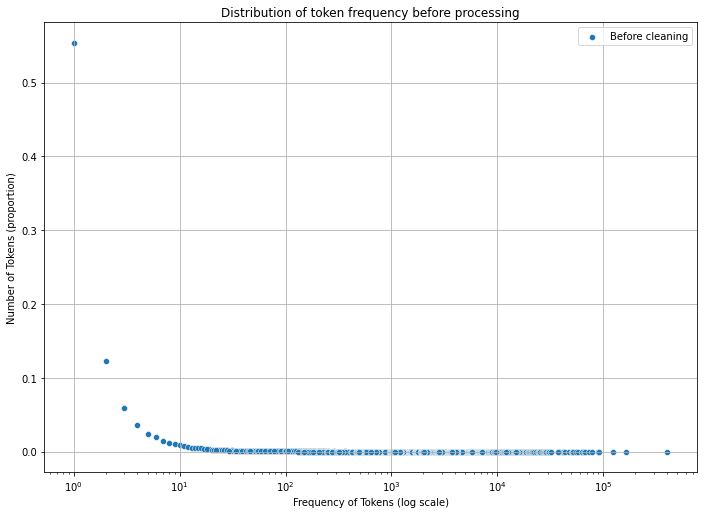

In [7]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
count_freq_plot_before_merge = sns.scatterplot(x="token_frequency", y="no_of_tokens_prop",
                                            data=freq_of_token_freq_before_merge_df, label='Before cleaning', ax=ax)
# count_freq_plot_before_merge.set(yscale='log')
count_freq_plot_before_merge.set(xscale='log')
count_freq_plot_before_merge.set(title="Distribution of token frequency before processing")
count_freq_plot_before_merge.set(xlabel="Frequency of Tokens (log scale)")
count_freq_plot_before_merge.set(ylabel="Number of Tokens (proportion)")
ax.grid()

In the above plot, the X-axis is the frequency of a token in the dataset i.e. number of times it has appeared in the 4M lines. The Y-axis is the count of tokens that have a given frequency on the X-axis (on a log scale in the first plot and as a proportion in the second plot). From this plot, it can be interpreted that nearly 50,000 (out of the 87,698) occur only once and the next highest number of tokens i.e. 10,000 occur only twice. The set of tokens that appear less than 6 times together compose 80% of the tokens and 89% of them are not in the dictionary. On the other end, only a few tokens have very high frequency and they are also present in the dictionary. The tokens with low frequency and not in the list of correctly spelled words represent that they are wrongly spelled or they contain foreign words that are not in the french dictionary or they have abbreviated forms of longer words and few have an old spelling or the words is currently not in use. Our aim in normalizing the tokens is to correct the spellings of these tokens and fill the abbreviated forms such that most of them are in the dictionary.

### Distribution of Tokens in the list of correctly spelled words

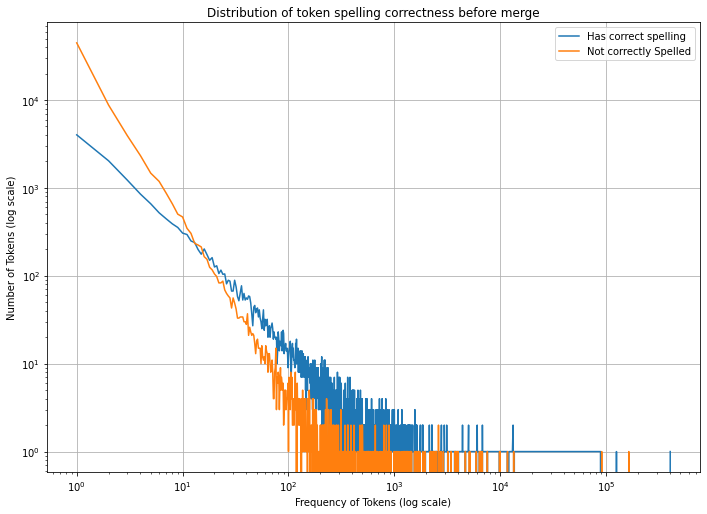

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness before merge")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

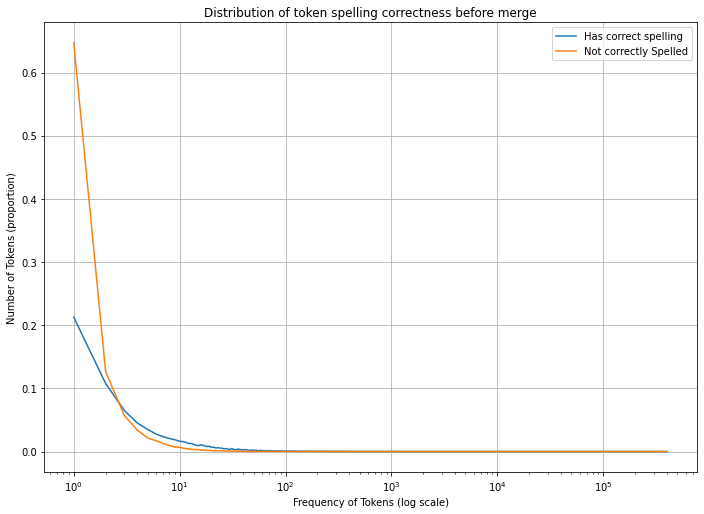

In [9]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary_prop", label='Has correct spelling', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary_prop", label='Not correctly Spelled', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness before merge")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (proportion)")
ax.grid()

## After creation of tags


After merging and filling the full forms, the tokens are compared.


### Merging tokens with 75% similarity

#### Read the unique tokens after tag generation

In [10]:
with open("./../data/intermediate_steps/sim_score_75/cleaned_unique_tokens.json", encoding="utf8") as f:
    unique_tokens_after_merge_sim75_with_count = json.load(f)
    
unique_tokens_after_merge_sim75 = unique_tokens_after_merge_sim75_with_count.keys()
unique_tokens_after_merge_sim75_in_dict = [uniq_tok for uniq_tok in unique_tokens_after_merge_sim75 if uniq_tok in words_with_correct_spellings]
num_of_unique_tokens_after_merge_sim75 = len(unique_tokens_after_merge_sim75)
num_of_unique_tokens_after_merge_sim75_in_dict = len(unique_tokens_after_merge_sim75_in_dict)

percent_in_dict = round(((num_of_unique_tokens_after_merge_sim75_in_dict/num_of_unique_tokens_after_merge_sim75)*100),2)

print("Number of unique tokens that represent the professions after merginig with 75% similarity are {}, \nand {} out of them are in the dictionary ({}%).".format(
    num_of_unique_tokens_after_merge_sim75, num_of_unique_tokens_after_merge_sim75_in_dict, percent_in_dict))

Number of unique tokens that represent the professions after merginig with 75% similarity are 24314, 
and 18882 out of them are in the dictionary (77.66%).


### Distribution of Frequency of Token Frequency

In [11]:
freq_of_token_freq_after_merge_sim75 = {}

for token, token_prop in unique_tokens_after_merge_sim75_with_count.items():
    count = token_prop["count"]
    if count not in freq_of_token_freq_after_merge_sim75:
        freq_of_token_freq_after_merge_sim75[count] = {"no_of_tokens": 0, "in_dictionary": 0, "not_in_dictionary":0}
    freq_of_token_freq_after_merge_sim75[count]["no_of_tokens"] += 1
    if token in words_with_correct_spellings:
        freq_of_token_freq_after_merge_sim75[count]["in_dictionary"] += 1
    else:
        freq_of_token_freq_after_merge_sim75[count]["not_in_dictionary"] += 1
    
freq_of_token_freq_after_merge_sim75_df = pd.DataFrame.from_dict(freq_of_token_freq_after_merge_sim75,
                                                  orient='index'
                                                 ).sort_values(by=['no_of_tokens'], ascending=False
                                                              ).rename_axis('token_frequency').reset_index()

freq_of_token_freq_after_merge_sim75_df["no_of_tokens_prop"] = freq_of_token_freq_after_merge_sim75_df["no_of_tokens"]/freq_of_token_freq_after_merge_sim75_df["no_of_tokens"].sum()
freq_of_token_freq_after_merge_sim75_df["in_dictionary_prop"] = freq_of_token_freq_after_merge_sim75_df["in_dictionary"]/freq_of_token_freq_after_merge_sim75_df["in_dictionary"].sum()
freq_of_token_freq_after_merge_sim75_df["not_in_dictionary_prop"] = freq_of_token_freq_after_merge_sim75_df["not_in_dictionary"]/freq_of_token_freq_after_merge_sim75_df["not_in_dictionary"].sum()

In [12]:
freq_of_token_freq_after_merge_sim75_df

,token_frequency,no_of_tokens,in_dictionary,not_in_dictionary,no_of_tokens_prop,in_dictionary_prop,not_in_dictionary_prop
0,1,6394,2662,3732,0.262976,0.140981,0.687040
1,2,2559,2038,521,0.105248,0.107933,0.095913
2,3,1587,1332,255,0.065271,0.070543,0.046944
3,4,1119,960,159,0.046023,0.050842,0.029271
4,5,844,741,103,0.034713,0.039244,0.018962
...,...,...,...,...,...,...,...
1585,1959,1,1,0,0.000041,0.000053,0.000000
1586,1962,1,1,0,0.000041,0.000053,0.000000
1587,1970,1,1,0,0.000041,0.000053,0.000000
1588,1984,1,1,0,0.000041,0.000053,0.000000


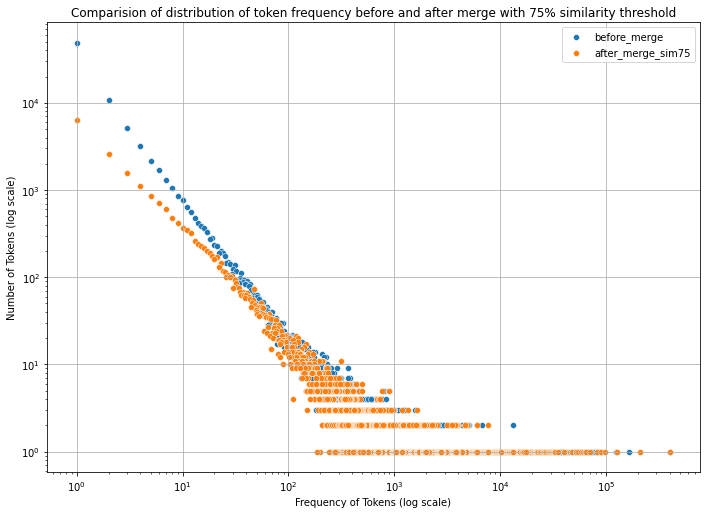

In [13]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens", label='before_merge', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="no_of_tokens", label='after_merge_sim75', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after merge with 75% similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

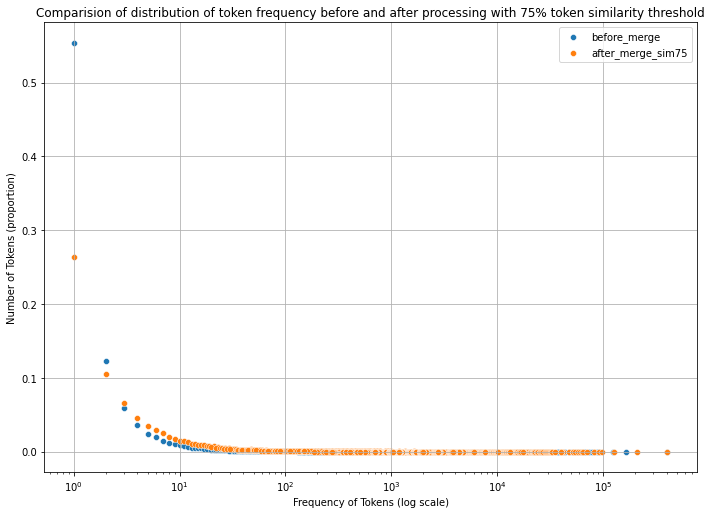

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens_prop", label='before_merge', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="no_of_tokens_prop", label='after_merge_sim75', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (proportion)")
ax.grid()

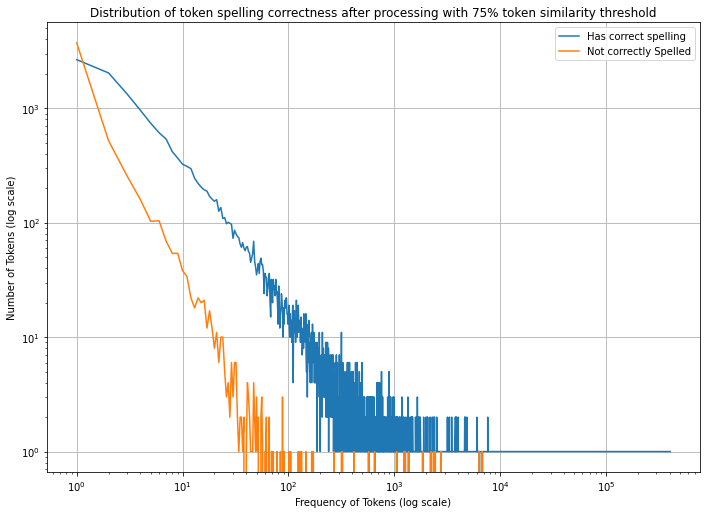

In [15]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

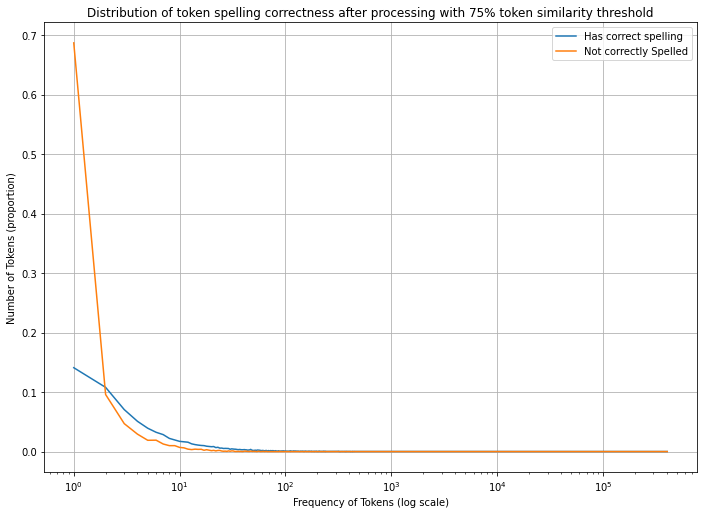

In [16]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary_prop", label='Has correct spelling', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary_prop", label='Not correctly Spelled', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (proportion)")
ax.grid()

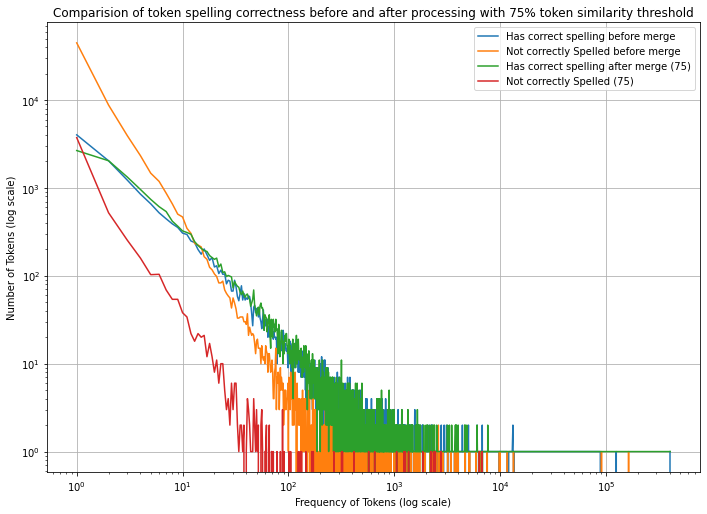

In [17]:
# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='before_merge', ax=ax)
# sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='after_merge_sim75', ax=ax)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of token spelling correctness before and after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

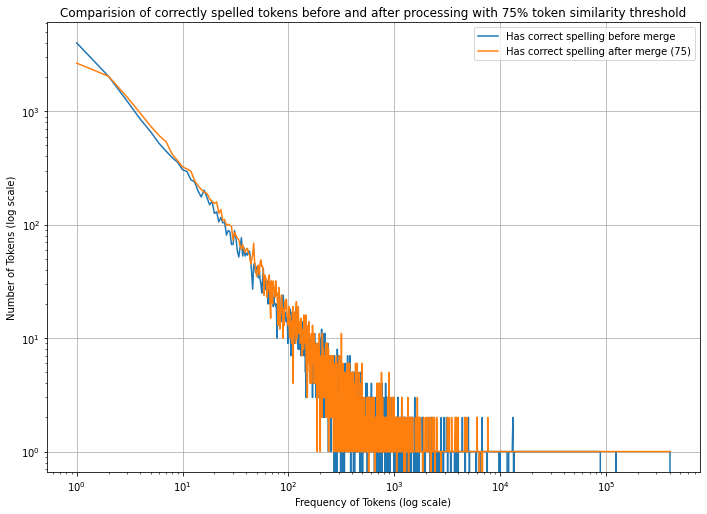

In [18]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
# sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of correctly spelled tokens before and after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

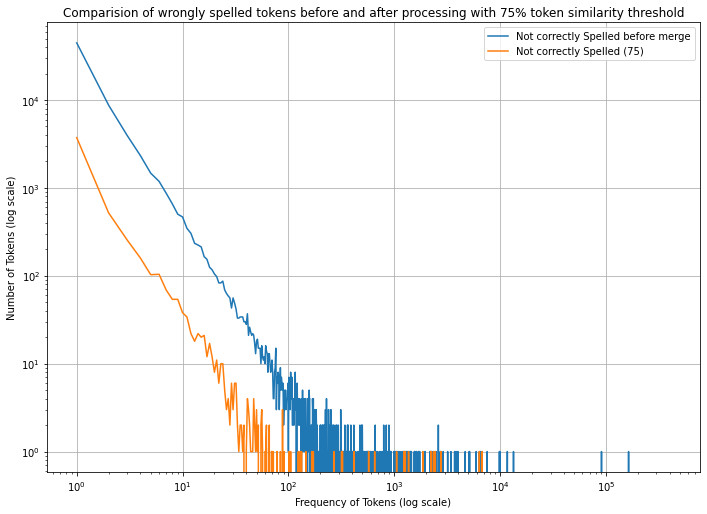

In [19]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

# sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of wrongly spelled tokens before and after processing with 75% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

### Merging tokens with 85% similarity


#### Read the unique tokens after merging

In [20]:
with open("./../data/intermediate_steps/sim_score_85/cleaned_unique_tokens.json", encoding="utf8") as f:
    unique_tokens_after_merge_sim85_with_count = json.load(f)
    
unique_tokens_after_merge_sim85 = unique_tokens_after_merge_sim85_with_count.keys()
unique_tokens_after_merge_sim85_in_dict = [uniq_tok for uniq_tok in unique_tokens_after_merge_sim85 if uniq_tok in words_with_correct_spellings]
num_of_unique_tokens_after_merge_sim85 = len(unique_tokens_after_merge_sim85)
num_of_unique_tokens_after_merge_sim85_in_dict = len(unique_tokens_after_merge_sim85_in_dict)

percent_in_dict = round(((num_of_unique_tokens_after_merge_sim85_in_dict/num_of_unique_tokens_after_merge_sim85)*100),2)

print("Number of unique tokens that represent the professions after processing with 85% token similarity threshold are {}, \nand {} out of them are in the dictionary ({}%).".format(
    num_of_unique_tokens_after_merge_sim85, num_of_unique_tokens_after_merge_sim85_in_dict, percent_in_dict))

Number of unique tokens that represent the professions after processing with 85% token similarity threshold are 43206, 
and 18882 out of them are in the dictionary (43.7%).


### Distribution of Frequency of Token Frequency

In [21]:
freq_of_token_freq_after_merge_sim85 = {}

for token, token_prop in unique_tokens_after_merge_sim85_with_count.items():
    count = token_prop["count"]
    if not count in freq_of_token_freq_after_merge_sim85:
        freq_of_token_freq_after_merge_sim85[count] = {"no_of_tokens": 0, "in_dictionary": 0, "not_in_dictionary":0}
    freq_of_token_freq_after_merge_sim85[count]["no_of_tokens"] += 1
    if token in words_with_correct_spellings:
        freq_of_token_freq_after_merge_sim85[count]["in_dictionary"] += 1
    else:
        freq_of_token_freq_after_merge_sim85[count]["not_in_dictionary"] += 1
    
freq_of_token_freq_after_merge_sim85_df = pd.DataFrame.from_dict(freq_of_token_freq_after_merge_sim85,
                                                  orient='index'
                                                 ).sort_values(by=['no_of_tokens'], ascending=False
                                                              ).rename_axis('token_frequency').reset_index()


freq_of_token_freq_after_merge_sim85_df["no_of_tokens_prop"] = freq_of_token_freq_after_merge_sim85_df["no_of_tokens"]/freq_of_token_freq_after_merge_sim85_df["no_of_tokens"].sum()
freq_of_token_freq_after_merge_sim85_df["in_dictionary_prop"] = freq_of_token_freq_after_merge_sim85_df["in_dictionary"]/freq_of_token_freq_after_merge_sim85_df["in_dictionary"].sum()
freq_of_token_freq_after_merge_sim85_df["not_in_dictionary_prop"] = freq_of_token_freq_after_merge_sim85_df["not_in_dictionary"]/freq_of_token_freq_after_merge_sim85_df["not_in_dictionary"].sum()

In [22]:
freq_of_token_freq_after_merge_sim85_df

,token_frequency,no_of_tokens,in_dictionary,not_in_dictionary,no_of_tokens_prop,in_dictionary_prop,not_in_dictionary_prop
0,1,20138,3085,17053,0.466093,0.163383,0.701077
1,2,4590,2044,2546,0.106235,0.108251,0.104670
2,3,2435,1274,1161,0.056358,0.067472,0.047731
3,4,1684,986,698,0.038976,0.052219,0.028696
4,5,1153,717,436,0.026686,0.037973,0.017925
...,...,...,...,...,...,...,...
1570,2052,1,1,0,0.000023,0.000053,0.000000
1571,2054,1,1,0,0.000023,0.000053,0.000000
1572,2057,1,1,0,0.000023,0.000053,0.000000
1573,2059,1,1,0,0.000023,0.000053,0.000000


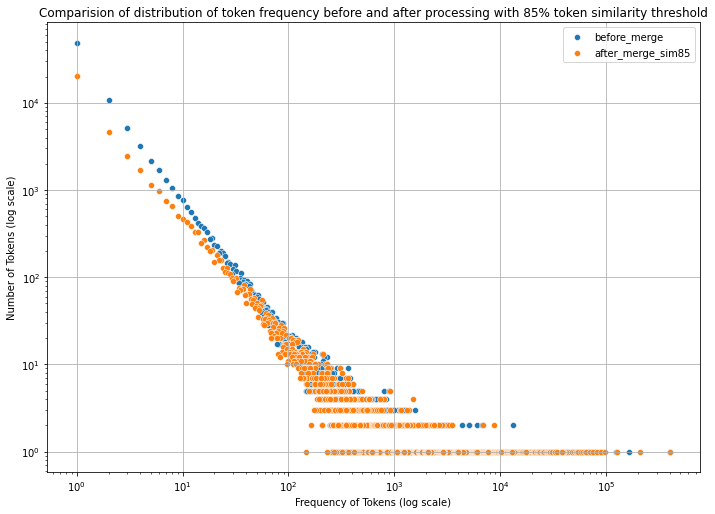

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens", label='before_merge', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="no_of_tokens", label='after_merge_sim85', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

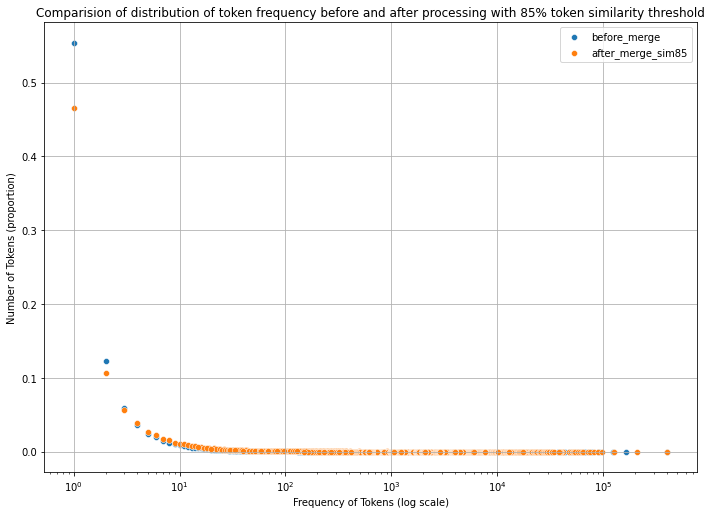

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens_prop", label='before_merge', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="no_of_tokens_prop", label='after_merge_sim85', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (proportion)")
ax.grid()

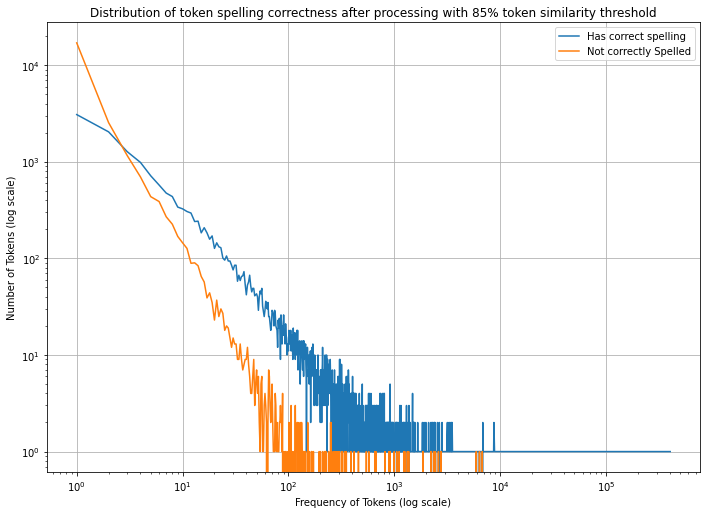

In [25]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

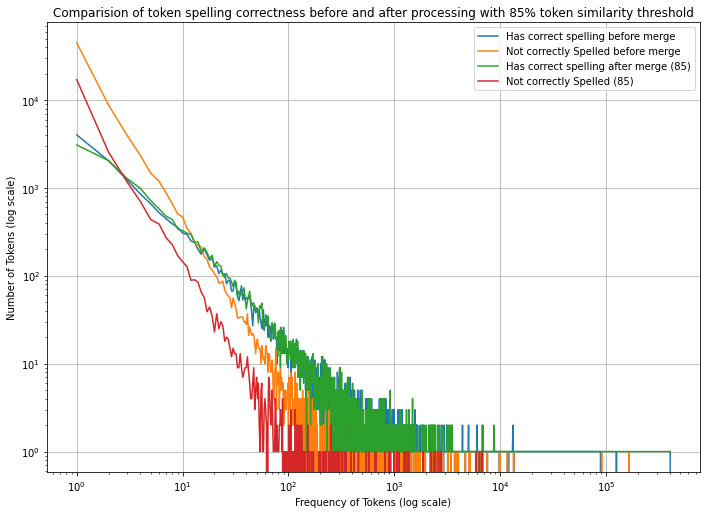

In [26]:
# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='before_merge', ax=ax)
# sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='after_merge_sim75', ax=ax)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of token spelling correctness before and after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

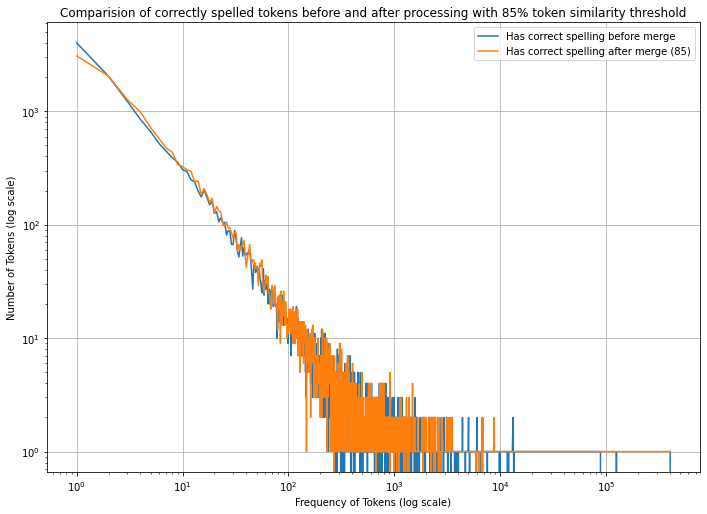

In [27]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)
# sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of correctly spelled tokens before and after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

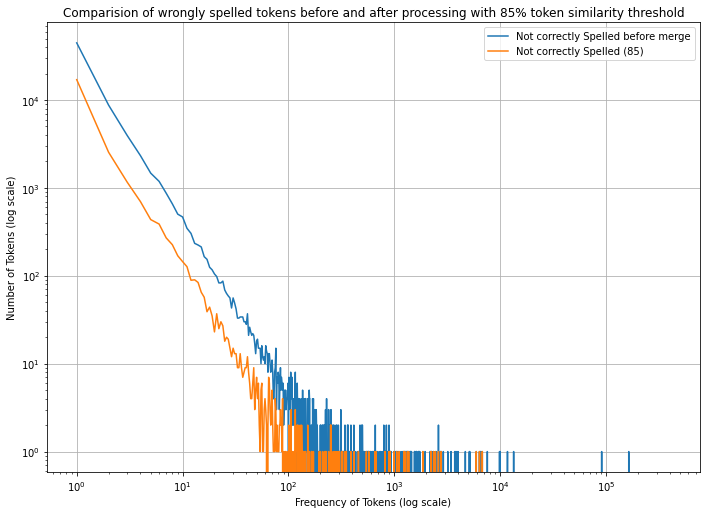

In [28]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

# sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

# sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of wrongly spelled tokens before and after processing with 85% token similarity threshold")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

## Comparison before and After merge

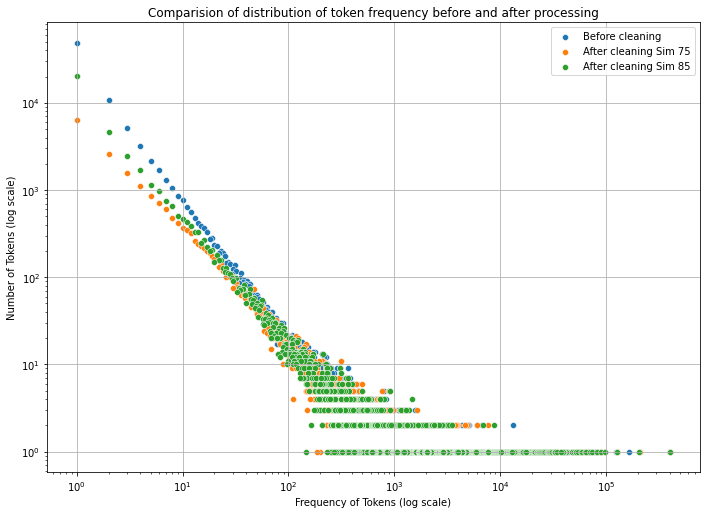

In [29]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens", label='Before cleaning', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="no_of_tokens", label='After cleaning Sim 75', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="no_of_tokens", label='After cleaning Sim 85', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

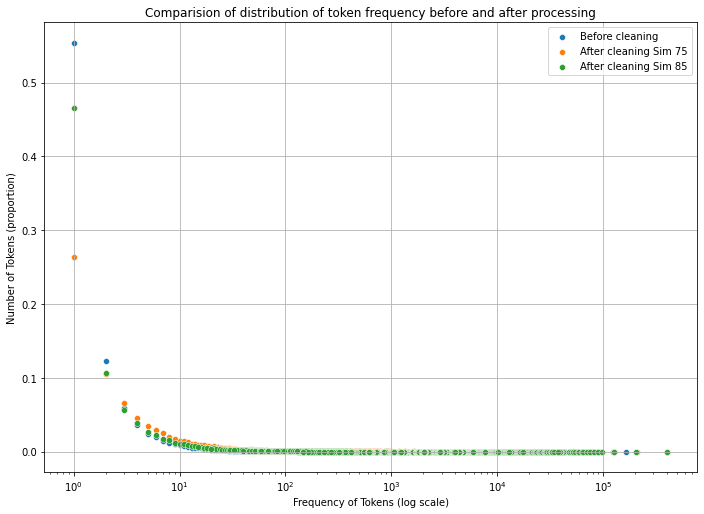

In [30]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.scatterplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="no_of_tokens_prop", label='Before cleaning', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="no_of_tokens_prop", label='After cleaning Sim 75', ax=ax)
sns.scatterplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="no_of_tokens_prop", label='After cleaning Sim 85', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of distribution of token frequency before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (proportion)")
ax.grid()

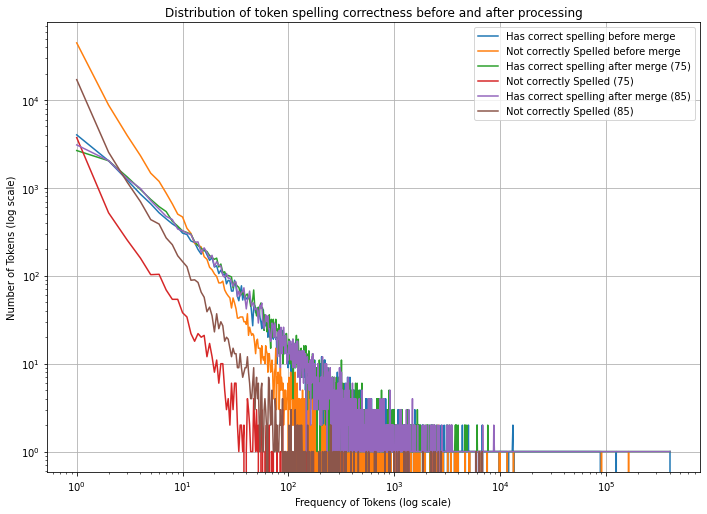

In [31]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Distribution of token spelling correctness before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

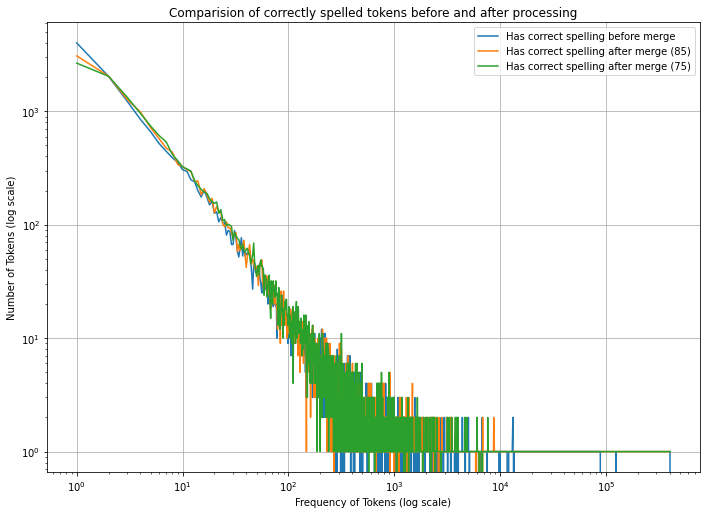

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)


ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of correctly spelled tokens before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

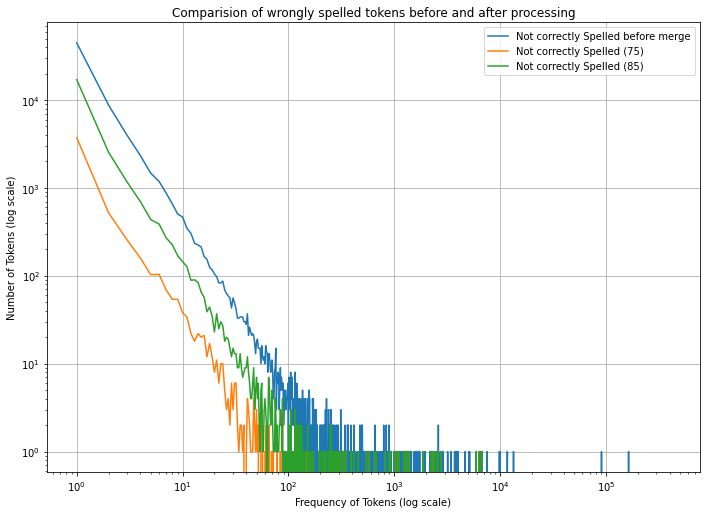

In [33]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)


sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of wrongly spelled tokens before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

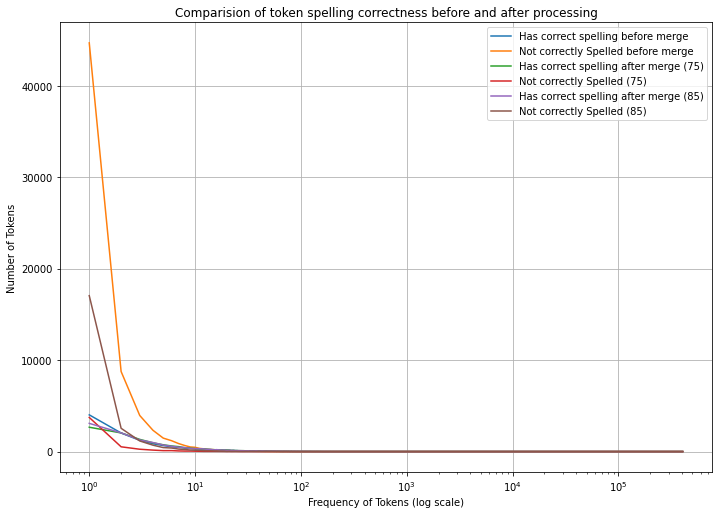

In [34]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)
sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)
sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of token spelling correctness before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens")
ax.grid()

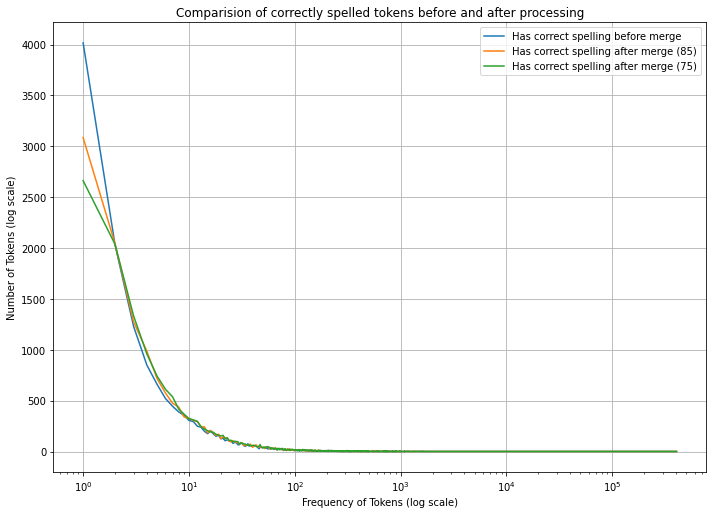

In [35]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="in_dictionary", label='Has correct spelling before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (85)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="in_dictionary", label='Has correct spelling after merge (75)', ax=ax)


# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of correctly spelled tokens before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

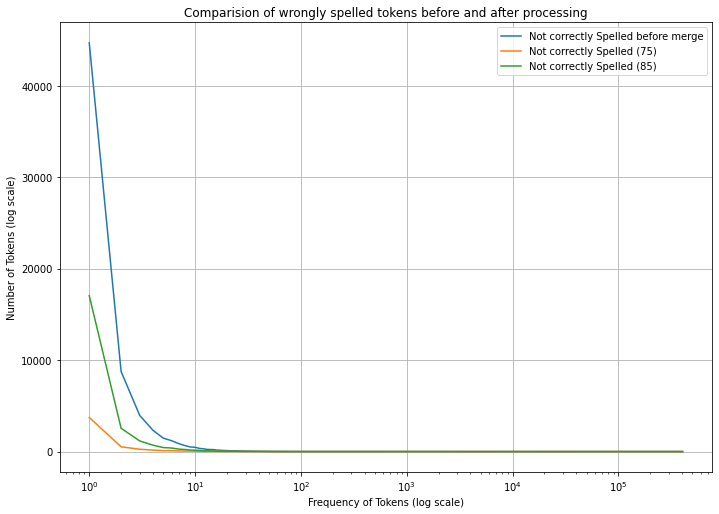

In [36]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)


sns.lineplot(data=freq_of_token_freq_before_merge_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled before merge', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim75_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (75)', ax=ax)

sns.lineplot(data=freq_of_token_freq_after_merge_sim85_df, x="token_frequency", y="not_in_dictionary", label='Not correctly Spelled (85)', ax=ax)

# ax.set(yscale='log')
ax.set(xscale='log')
ax.set(title="Comparision of wrongly spelled tokens before and after processing")
ax.set(xlabel="Frequency of Tokens (log scale)")
ax.set(ylabel="Number of Tokens (log scale)")
ax.grid()

## Distriution of round wise similiarity scores during the merge

During the each iteration of each round of the merge process the summary of distribution of the similarity scores is printed and also saved to a pickle file. Here the information is summarised.

Read the replacement scores files. Each file is an array of array. The first level length of array corresponds to the number of iterations occured in the round and the second level length corresponds to number of unique merges occured during the iteration.

### Merging with similarity score of 75

In [37]:
round_wise_data = {1: {}, 2: {}, 3:{}}

with open(
    "./../data/intermediate_steps/sim_score_75/replacement_scores_round_after_round_1.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_1 = pickle.load(outfile)
    
for itr,merg_scr in enumerate(replacement_scores_round_after_round_1):
    round_wise_data[1][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}
    
with open(
    "./../data/intermediate_steps/sim_score_75/replacement_scores_round_after_round_2.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_2 = pickle.load(outfile)
    
for itr,merg_scr in enumerate(replacement_scores_round_after_round_2):
    round_wise_data[2][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}
    

with open(
    "./../data/intermediate_steps/sim_score_75/replacement_scores_round_after_round_3.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_3 = pickle.load(outfile)

for itr,merg_scr in enumerate(replacement_scores_round_after_round_3):
    round_wise_data[3][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}

In [38]:
avg_sim_scr_per_itr_75 = {}

for round_num in range(1,4):
    avg_sim_scr_per_itr_75["round_" + str(round_num)] = {itr: info["average_merge_score"] for itr, info in round_wise_data[round_num].items()}
    
median_sim_scr_per_itr_75 = {}

for round_num in range(1,4):
    median_sim_scr_per_itr_75["round_" + str(round_num)] = {itr: info["median_merge_score"] for itr, info in round_wise_data[round_num].items()}
    
    
unq_mergs_per_itr_75 = {}

for round_num in range(1,4):
    unq_mergs_per_itr_75["round_" + str(round_num)] = {itr: info["uniq_mergs"] for itr, info in round_wise_data[round_num].items()}    

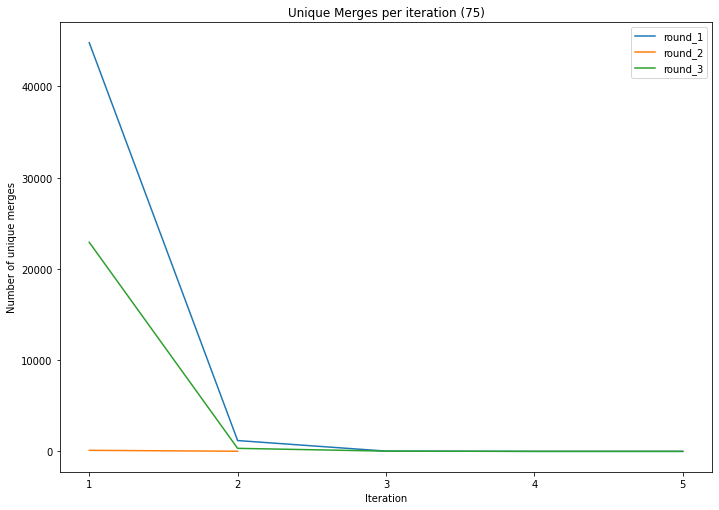

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

df_mrgs = pd.DataFrame(unq_mergs_per_itr_75)
ax = df_mrgs.plot.line(title="Unique Merges per iteration (75)", xlabel="Iteration", ylabel="Number of unique merges", ax=ax)
ax.locator_params(integer=True)

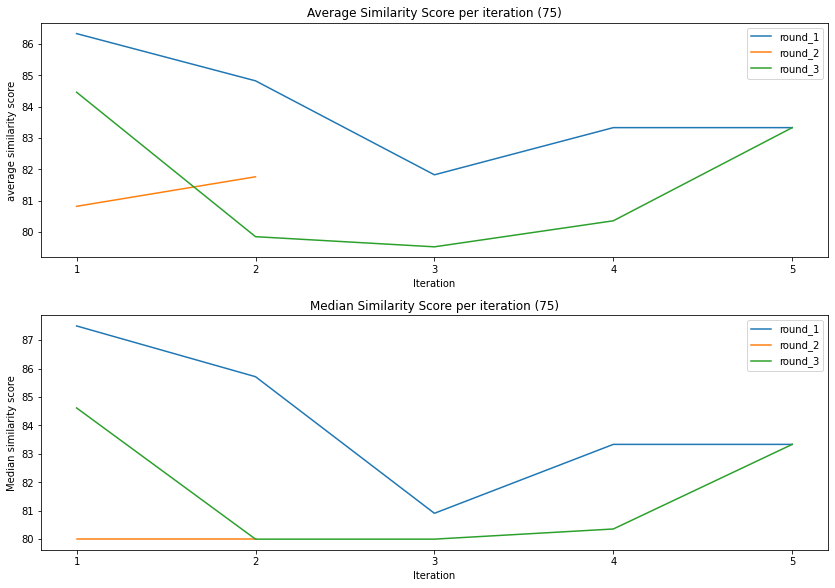

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(11.7, 8.27)

df_avg_scr = pd.DataFrame(avg_sim_scr_per_itr_75)
ax1 = df_avg_scr.plot.line(title="Average Similarity Score per iteration (75)", xlabel="Iteration", ylabel="average similarity score", ax=axes[0])
ax1.locator_params(integer=True)
    
df_median_scr = pd.DataFrame(median_sim_scr_per_itr_75)
ax2 = df_median_scr.plot.line(title="Median Similarity Score per iteration (75)", xlabel="Iteration", ylabel="Median similarity score", ax=axes[1])
ax2.locator_params(integer=True)

plt.tight_layout()

In [41]:
for rnd, avg_scrs in avg_sim_scr_per_itr_75.items():
    print("The average similarity score for tokens merged in {} is {}".format(rnd, np.mean(list(avg_scrs.values()))))

The average similarity score for tokens merged in round_1 is 83.93175905365686
The average similarity score for tokens merged in round_2 is 81.29155429146071
The average similarity score for tokens merged in round_3 is 81.5060338193079


In [42]:
(83.93175905365686 + 81.29155429146071 + 81.5060338193079)/3

82.24311572147515

### Merging with similarity score of 85

In [43]:
round_wise_data = {1: {}, 2: {}, 3:{}}

with open(
    "./../data/intermediate_steps/sim_score_85/replacement_scores_round_after_round_1.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_1 = pickle.load(outfile)
    
for itr,merg_scr in enumerate(replacement_scores_round_after_round_1):
    round_wise_data[1][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}
    
with open(
    "./../data/intermediate_steps/sim_score_85/replacement_scores_round_after_round_2.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_2 = pickle.load(outfile)
    
for itr,merg_scr in enumerate(replacement_scores_round_after_round_2):
    round_wise_data[2][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}
    

with open(
    "./../data/intermediate_steps/sim_score_85/replacement_scores_round_after_round_3.pickle", "rb"
) as outfile:
    replacement_scores_round_after_round_3 = pickle.load(outfile)

for itr,merg_scr in enumerate(replacement_scores_round_after_round_3):
    round_wise_data[3][itr+1] = {"uniq_mergs": len(merg_scr), "average_merge_score": np.mean(merg_scr), "median_merge_score": np.median(merg_scr)}

In [44]:
avg_sim_scr_per_itr_85 = {}

for round_num in range(1,4):
    avg_sim_scr_per_itr_85["round_" + str(round_num)] = {itr: info["average_merge_score"] for itr, info in round_wise_data[round_num].items()}
    
median_sim_scr_per_itr_85 = {}

for round_num in range(1,4):
    median_sim_scr_per_itr_85["round_" + str(round_num)] = {itr: info["median_merge_score"] for itr, info in round_wise_data[round_num].items()}
    
    
unq_mergs_per_itr_85 = {}

for round_num in range(1,4):
    unq_mergs_per_itr_85["round_" + str(round_num)] = {itr: info["uniq_mergs"] for itr, info in round_wise_data[round_num].items()}    

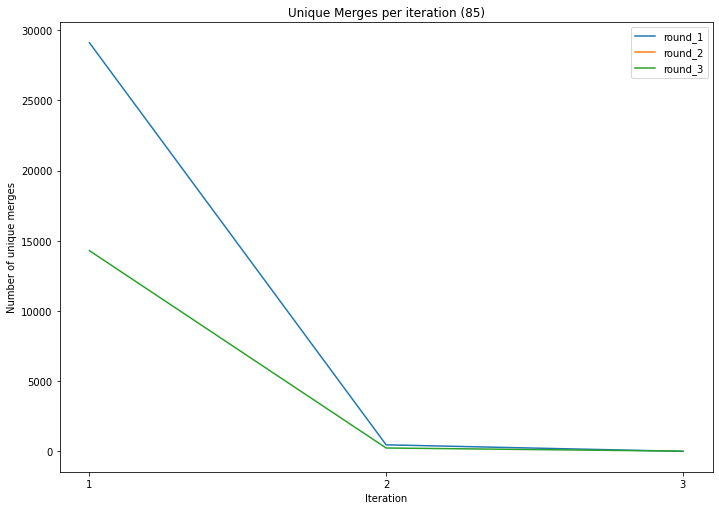

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

df_mrgs = pd.DataFrame(unq_mergs_per_itr_85)
ax = df_mrgs.plot.line(title="Unique Merges per iteration (85)", xlabel="Iteration", ylabel="Number of unique merges", ax=ax)
ax.locator_params(integer=True)

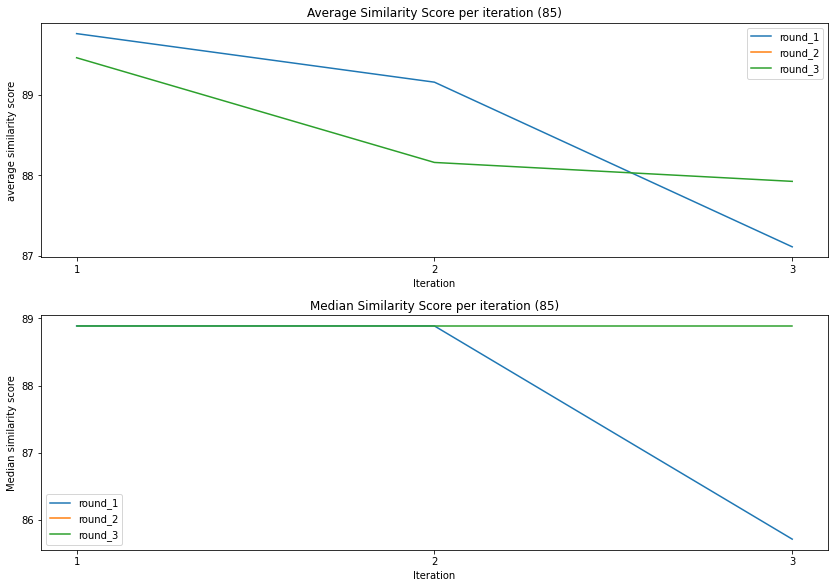

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(11.7, 8.27)

df_avg_scr = pd.DataFrame(avg_sim_scr_per_itr_85)
ax1 = df_avg_scr.plot.line(title="Average Similarity Score per iteration (85)", xlabel="Iteration", ylabel="average similarity score", ax=axes[0])
ax1.locator_params(integer=True)
    
df_median_scr = pd.DataFrame(median_sim_scr_per_itr_85)
ax2 = df_median_scr.plot.line(title="Median Similarity Score per iteration (85)", xlabel="Iteration", ylabel="Median similarity score", ax=axes[1])
ax2.locator_params(integer=True)

plt.tight_layout()

In [47]:
for rnd, avg_scrs in avg_sim_scr_per_itr_85.items():
    print("The average similarity score for tokens merged in {} is {}".format(rnd, np.mean(list(avg_scrs.values()))))

The average similarity score for tokens merged in round_1 is 88.67751224538982
The average similarity score for tokens merged in round_2 is 88.8060042019318
The average similarity score for tokens merged in round_3 is 88.51599277203906


### Comparision of Average similarity scores

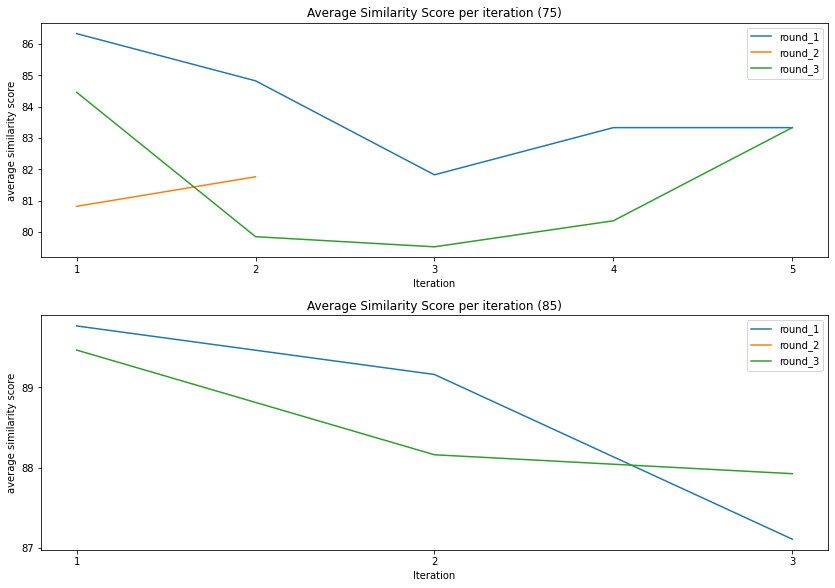

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(11.7, 8.27)

df_avg_scr = pd.DataFrame(avg_sim_scr_per_itr_75)
ax1 = df_avg_scr.plot.line(title="Average Similarity Score per iteration (75)", xlabel="Iteration", ylabel="average similarity score", ax=axes[0])
ax1.locator_params(integer=True)
    
df_avg_scr = pd.DataFrame(avg_sim_scr_per_itr_85)
ax1 = df_avg_scr.plot.line(title="Average Similarity Score per iteration (85)", xlabel="Iteration", ylabel="average similarity score", ax=axes[1])
ax1.locator_params(integer=True)
plt.tight_layout()